In [1]:
'''This Notebook generates Figure 3g for the MIST manuscript'''

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import numpy as np
from tqdm import trange

In [2]:
data_names = ['Human_Breast_Cancer_BAS1', 'Human_Prostate_Cancer_Acinar_Cell_Carcinoma_FFPE',
              'Human_Breast_Cancer_BAS2', 'Human_Breast_Cancer_Ductal_Carcinoma_FFPE','Human_Glioblastoma', 
              'Melanoma', 'MouseAD', 'Human_Invasive_Ductal_Carcinoma', 'Human_Ovarian_Cancer', 
              'MouseWT', 'Human_Colorectal_Cancer','Human_Prostate_Cancer_Adenocarcinoma_FFPE']

data_shorts = dict(zip(data_names, ['HBCB1', 'HPCACCF',
                                    'HBCB2', 'HBCDC', 'HG',
                                    'Melanoma', 'MouseAD', 'HIDC', 'HOC',
                                    'MouseWT', 'HCC', 'HPCA']))

data_order = ['Human_Breast_Cancer_BAS1', 'Human_Breast_Cancer_BAS2',  'Human_Breast_Cancer_Ductal_Carcinoma_FFPE',             
              'Human_Prostate_Cancer_Acinar_Cell_Carcinoma_FFPE', 'Human_Prostate_Cancer_Adenocarcinoma_FFPE',
              'Human_Invasive_Ductal_Carcinoma', 'Human_Ovarian_Cancer', 'Human_Glioblastoma', 'Human_Colorectal_Cancer', 
              'Melanoma', 'MouseAD', 'MouseWT']

data_order = [data_shorts[dn] for dn in data_order]

run_in_houston = ['Human_Breast_Cancer_BAS1','Human_Breast_Cancer_BAS2','Human_Ovarian_Cancer', 'Melanoma']

In [22]:
def corrs(ori, ho, im):
    """This method calculate the SCC and PCC between:
        1. holdout data vs. ground truth
        2. imputed data vs. ground truth
        3. Improvement of MIST through 2 - 1
    """
    ori = ori.loc[ho.index, ho.columns]
    im = im.loc[ho.index, ho.columns]
    dfs = []
    genes = ho.columns.tolist()
    for i in range(len(genes)):
        g = genes[i]
        inds = np.where(ori[g].to_numpy())
        ori_nonzeros = ori[g].to_numpy()[inds]
        ho_nonzeros = ho[g].to_numpy()[inds]
        im_nonzeros = im[g].to_numpy()[inds]
        
        ho_pcc = pearsonr(ho_nonzeros, ori_nonzeros)[0]
        ho_scc = spearmanr(ho_nonzeros, ori_nonzeros)[0]
        
        im_pcc = pearsonr(im_nonzeros, ori_nonzeros)[0]
        im_scc = spearmanr(im_nonzeros, ori_nonzeros)[0]
        
        del_pcc = im_pcc - ho_pcc
        del_scc = im_scc - ho_scc
        df = pd.DataFrame(data=[[ho_pcc, ho_scc, im_pcc, im_scc, del_pcc, del_scc]], 
                          columns=["ho_pcc", "ho_scc", "im_pcc", "im_scc", "del_pcc", "del_scc"])
        dfs.append(df)
    dfs = pd.concat(dfs)
    return dfs

In [23]:
dfs = []
models = ['MIST', 'MAGIC', 'spKNN', 'mcImpute', 'knnSmooth']
for dn in data_names:
    if dn in run_in_houston:
        dataDir = '../data'
    else:
        dataDir = '../data_other_servers'
    ori_fn = f"{dataDir}/{dn}/norm.csv"
    ori = pd.read_csv(ori_fn, index_col=0)
    ori = np.log2(ori + 1)
    
    for cv in range(5):
        ho = pd.read_csv(f'{dataDir}/{dn}/ho_data_{cv}.csv', index_col=0) # get holdout data
        for model in models:
            model_fn = f'{dataDir}/{dn}/imputed/{model}_{cv}.csv'# get imptued data
            im = pd.read_csv(model_fn, index_col=0)
                            
            ho = np.log2(ho + 1) # log transform
            im = np.log2(im + 1)
        
            df = corrs(ori, ho, im) # calculate before and after imputation correlation scores
            df['cv'] = cv
            df['data'] = dn
            df['model'] = model
            print(f"[{dn}] fold: {cv}  model: {model}")
            dfs.append(df)
dfs = pd.concat(dfs)

[Human_Breast_Cancer_BAS1] fold: 0  model: MIST
[Human_Breast_Cancer_BAS1] fold: 0  model: MAGIC
[Human_Breast_Cancer_BAS1] fold: 0  model: spKNN
[Human_Breast_Cancer_BAS1] fold: 0  model: mcImpute
[Human_Breast_Cancer_BAS1] fold: 0  model: knnSmooth
[Human_Breast_Cancer_BAS1] fold: 1  model: MIST
[Human_Breast_Cancer_BAS1] fold: 1  model: MAGIC
[Human_Breast_Cancer_BAS1] fold: 1  model: spKNN
[Human_Breast_Cancer_BAS1] fold: 1  model: mcImpute
[Human_Breast_Cancer_BAS1] fold: 1  model: knnSmooth
[Human_Breast_Cancer_BAS1] fold: 2  model: MIST
[Human_Breast_Cancer_BAS1] fold: 2  model: MAGIC
[Human_Breast_Cancer_BAS1] fold: 2  model: spKNN
[Human_Breast_Cancer_BAS1] fold: 2  model: mcImpute
[Human_Breast_Cancer_BAS1] fold: 2  model: knnSmooth
[Human_Breast_Cancer_BAS1] fold: 3  model: MIST
[Human_Breast_Cancer_BAS1] fold: 3  model: MAGIC
[Human_Breast_Cancer_BAS1] fold: 3  model: spKNN
[Human_Breast_Cancer_BAS1] fold: 3  model: mcImpute
[Human_Breast_Cancer_BAS1] fold: 3  model: knnSmo

In [24]:
dfs.to_csv("../figures/scc_pcc_compare_models_with_wo_imputation.csv")

In [2]:
dfs = pd.read_csv("../figures/scc_pcc_compare_models_with_wo_imputation.csv")

In [4]:
dfs

,Unnamed: 0,ho_pcc,ho_scc,im_pcc,im_scc,del_pcc,del_scc,cv,data,model
0,0,0.281141,0.654233,0.916611,0.904125,0.635469,0.249891,0,Human_Breast_Cancer_BAS1,MIST
1,0,0.268382,0.661813,0.922171,0.914911,0.653788,0.253098,0,Human_Breast_Cancer_BAS1,MIST
2,0,0.155732,0.654927,0.953645,0.953787,0.797913,0.298859,0,Human_Breast_Cancer_BAS1,MIST
3,0,0.233568,0.620981,0.922740,0.911721,0.689172,0.290740,0,Human_Breast_Cancer_BAS1,MIST
4,0,0.294357,0.639787,0.943808,0.930533,0.649451,0.290746,0,Human_Breast_Cancer_BAS1,MIST
...,...,...,...,...,...,...,...,...,...,...
982845,0,0.014622,0.645776,0.172797,0.326981,0.158174,-0.318794,4,Human_Prostate_Cancer_Adenocarcinoma_FFPE,knnSmooth
982846,0,0.009712,0.637744,0.121161,0.296644,0.111449,-0.341099,4,Human_Prostate_Cancer_Adenocarcinoma_FFPE,knnSmooth
982847,0,0.007166,0.630024,0.123098,0.274991,0.115932,-0.355032,4,Human_Prostate_Cancer_Adenocarcinoma_FFPE,knnSmooth
982848,0,0.056952,0.661493,0.202613,0.351022,0.145661,-0.310472,4,Human_Prostate_Cancer_Adenocarcinoma_FFPE,knnSmooth


/home/alexw/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


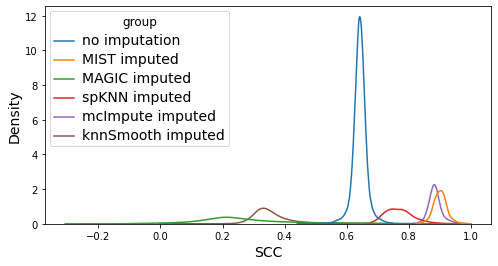

In [5]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,4))
df1 = dfs[['ho_scc', 'data']]
df1['group'] = 'no imputation'
df1.columns = ['scc', 'data', 'group']
dfs_new = [df1]
models = ['MIST', 'MAGIC', 'spKNN', 'mcImpute', 'knnSmooth']
for i in range(5):
    model = models[i]
    df2 = dfs.loc[dfs.model==model]
    df2 = df2[['im_scc', 'data']]
    df2['group'] = f'{model} imputed'
    df2.columns = ['scc', 'data', 'group']
    dfs_new.append(df2)
dfs_new = pd.concat(dfs_new)
sns.kdeplot(data=dfs_new, x="scc", hue='group', color='data', ax=ax)
ax.set_xlabel("SCC", fontsize=14)
ax.set_ylabel("Density", fontsize=14)

plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title
plt.savefig("../figures/updated_imputation_scc_changes_all_models.png", dpi=200, bbox_inches='tight')

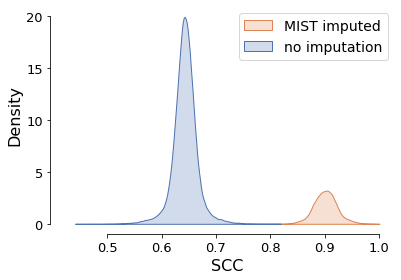

In [14]:
f, ax = plt.subplots(1, 1, figsize=(6,4))
dfs_new_mist = dfs_new.loc[dfs_new.group.isin(['MIST imputed', 'no imputation'])]

sns.kdeplot(data=dfs_new_mist, x="scc", hue='group', ax=ax, shade=True, palette="deep")
ax.legend(['MIST imputed', 'no imputation'], loc=1, ncol=1, fontsize=14)
plt.xlabel("SCC", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.tick_params(axis='both', labelsize=13)
sns.despine(offset=10, trim=True);
plt.savefig("../figures/updated_imputation_scc_changes_MIST.png", dpi=200, bbox_inches='tight')